# Hermite interpolation

### Nicolás Guarín-Zapata


In this notebook, we find the (Hermite) interpolation functions for the domain
[-1, 1]. We later on try it on a pieciwise interpolation. Notice that this
interpolation has $C^1$ continuity compared to the $C^0$ continuity that is
common in Lagrange interpolation.

In [1]:
%matplotlib notebook
from __future__ import division
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
sym.init_printing()

We want to find a set of basis function that satisfy

\begin{align}
N_1(x_1) &= 1\\
N_1(x_2) &= 0\\
N_2(x_1) &= 1\\
N_2(x_2) &= 0\\
N'_3(x_1) &= 1\\
N'_3(x_2) &= 0\\
N'_4(x_1) &= 1\\
N'_4(x_2) &= 0
\end{align}

These can be written as
$$
\begin{bmatrix}
1 &x_1 &x_1^2 &x_1^3\\
1 &x_2 &x_2^2 &x_2^3\\
0 &1 &2x_1 &3x_1^2\\
0 &1 &2x_2 &3x_2^2
\end{bmatrix}
\begin{bmatrix}
a_{11} &a_{12} &a_{13} &a_{14}\\
a_{21} &a_{22} &a_{23} &a_{24}\\
a_{31} &a_{32} &a_{33} &a_{34}\\
a_{41} &a_{42} &a_{43} &a_{44}
\end{bmatrix} = 
\begin{bmatrix}
1 &0 &0 &0\\
0 &1 &0 &0\\
0 &0 &1 &0\\
0 &0 &0 &1
\end{bmatrix}
$$

The formula for interpolation would be

$$f(x) \approx N_1(x) u_1 + N_2(x) u_2 + |J|(N_3(x) u'_3 + N_4(x) u'_4)\quad \forall x\in [a, b]$$

with $|J| = (b - a)/2$ the Jacobian determinant of the transformation.


In [3]:
x1, x2, x = sym.symbols("x1 x2 x")
V = sym.Matrix([
    [1, x1, x1**2, x1**3],
    [1, x2, x2**2, x2**3],
    [0, 1, 2*x1, 3*x1**2],
    [0, 1, 2*x2, 3*x2**2]])
V

⎡         2      3 ⎤
⎢1  x₁  x₁     x₁  ⎥
⎢                  ⎥
⎢         2      3 ⎥
⎢1  x₂  x₂     x₂  ⎥
⎢                  ⎥
⎢                 2⎥
⎢0  1   2⋅x₁  3⋅x₁ ⎥
⎢                  ⎥
⎢                 2⎥
⎣0  1   2⋅x₂  3⋅x₂ ⎦

In [4]:
sym.simplify(V.inv())

⎡          2                                2                                 
⎢        x₂ ⋅(3⋅x₁ - x₂)                  x₁ ⋅(x₁ - 3⋅x₂)                -x₁⋅x
⎢───────────────────────────────  ───────────────────────────────  ───────────
⎢  3       2             2     3    3       2             2     3    2        
⎢x₁  - 3⋅x₁ ⋅x₂ + 3⋅x₁⋅x₂  - x₂   x₁  - 3⋅x₁ ⋅x₂ + 3⋅x₁⋅x₂  - x₂   x₁  - 2⋅x₁⋅
⎢                                                                             
⎢           -6⋅x₁⋅x₂                          6⋅x₁⋅x₂                 x₂⋅(2⋅x₁
⎢───────────────────────────────  ───────────────────────────────  ───────────
⎢  3       2             2     3    3       2             2     3    2        
⎢x₁  - 3⋅x₁ ⋅x₂ + 3⋅x₁⋅x₂  - x₂   x₁  - 3⋅x₁ ⋅x₂ + 3⋅x₁⋅x₂  - x₂   x₁  - 2⋅x₁⋅
⎢                                                                             
⎢          3⋅(x₁ + x₂)                    -(3⋅x₁ + 3⋅x₂)              -(x₁ + 2
⎢───────────────────────────────  ──────────────────

In [5]:
V_inv = sym.simplify(V.subs({x1:-1, x2:1}).inv())
V_inv

⎡1/2   1/2   1/4   -1/4⎤
⎢                      ⎥
⎢-3/4  3/4   -1/4  -1/4⎥
⎢                      ⎥
⎢ 0     0    -1/4  1/4 ⎥
⎢                      ⎥
⎣1/4   -1/4  1/4   1/4 ⎦

In [6]:
sym.factor(V_inv.T * sym.Matrix([1, x, x**2, x**3]))

⎡        2         ⎤
⎢ (x - 1) ⋅(x + 2) ⎥
⎢ ──────────────── ⎥
⎢        4         ⎥
⎢                  ⎥
⎢                2 ⎥
⎢-(x - 2)⋅(x + 1)  ⎥
⎢──────────────────⎥
⎢        4         ⎥
⎢                  ⎥
⎢        2         ⎥
⎢ (x - 1) ⋅(x + 1) ⎥
⎢ ──────────────── ⎥
⎢        4         ⎥
⎢                  ⎥
⎢                2 ⎥
⎢ (x - 1)⋅(x + 1)  ⎥
⎢ ──────────────── ⎥
⎣        4         ⎦

For $a=-1, b=1$, the interpolation basis would be

\begin{align}
N_1 (x) &= \frac{1}{4} (x - 1)^2 (2 + x)\\
N_2 (x) &= \frac{1}{4} (x + 1)^2 (2 - x)\\
N_3 (x) &= \frac{1}{4} (x - 1)^2 (x + 1)\\
N_4 (x) &= \frac{1}{4} (x + 1)^2 (x - 1)\, .
\end{align}

In [7]:
def hermite_interp(fun, grad, x0=-1, x1=1, npts=101):
    jaco = (x1 - x0)/2
    x = np.linspace(-1, 1, npts)
    f1 = fun(x0)
    f2 = fun(x1)
    g1 = grad(x0)
    g2 = grad(x1)
    N1 = 1/4*(x - 1)**2 * (2 + x)
    N2 = 1/4*(x + 1)**2 * (2 - x)
    N3 = 1/4*(x - 1)**2 * (x + 1)
    N4 = 1/4*(x + 1)**2 * (x - 1)
    interp = N1*f1 + N2*f2 + jaco*(N3*g1 + N4*g2)
    return interp

In [8]:
def fun(x):
    return np.sin(2*np.pi*x)/(2*np.pi*x)


def grad(x):
    return np.cos(2*np.pi*x)/x - np.sin(2*np.pi*x)/(2*np.pi*x**2)

<IPython.core.display.Javascript object>


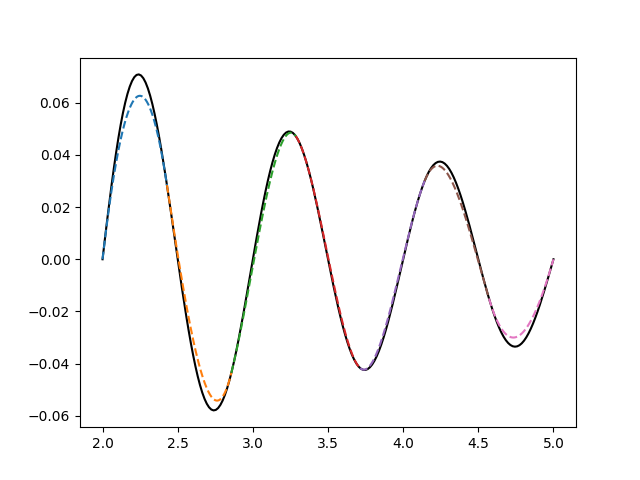

In [9]:
a = 2
b = 5
nels = 7
npts = 200
x = np.linspace(a, b, npts)
y = fun(x)
plt.plot(x, y, color="black")
xi = np.linspace(a, b, num=nels, endpoint=False)
dx = xi[1] - xi[0]
for x0 in xi:
    x1 = x0 + dx
    x = np.linspace(x0, x1, npts)
    y = hermite_interp(fun, grad, x0=x0, x1=x1, npts=npts)    
    plt.plot(x, y, linestyle="dashed")
plt.show();

In [10]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()